In [1]:
import numpy as np
from scipy import stats
from scipy.special import erf
import matplotlib.pyplot as plt
%matplotlib inline

from inverse_sampling import *

# Homework 1 (80 pts)

Problems have different cost.

Write your answers in jupyter notebook format using $\LaTeX$ capabilities **(strongly recommended)** (or just simple ```tex``` manuscript, **less recommended**), or write it down on the paper, scan it and submit **(not recommended)**. A python code should be implemented in jupyter notebook format.

## Problem 1 (14 pts)

Let $\xi$ be some random variable with CDF $F(x)$.
-  **(10 pts)**. In which cases the random variable
$$
\eta =F(\xi)
$$
has uniform distribution ($\eta\sim \mathcal U(0,1)$)?
Prove your answer.

---

Consider $F$ which is strictly increasing and continuous, then $F^{-1}$ exists. 
$$
 x \in [0, 1] \qquad F_\eta = \Pr\{\underbrace{F_{\xi}(\xi)}_{\eta} < x\} = \Pr\{\xi < F_{\xi}^{-1}(x)\} = F_{\xi}(F_{\xi}^{-1}(x)) = x
$$

Therefore, $F_\eta$ is uniform

We can weaken the requirements to $F$ by considering the following generalization of the inverse:
$F_{\xi}^{-1, +}(t) := \inf\{x: F_{\xi}(x) \gt t\}, \;\; t \in [0, 1]$. So, now we can consider continous (not-strictly) monotonous functions. This way, all points from the unit interval will be mapped by $F^{-1,+}$ to the subset (union of segments) of the $F$'s domain, where $F$ is increasing. And these segments are mapped by $F$ (in the multistatement above) to the unit interval again.

$$
    F(F^{-1,+}(x)) = x\\
$$

On the segments where $F$ is increasing:
$$
    F^{-1,+}(x) = \inf\{t: F(t) \to x\} = \lim_{F(t)->x+0} t = F^{-1}(x)
$$

Now, let $F = F(t_0) = \mathrm{const}$ in $[t_0, t_1]$, and $x = F(t_0)$

$$
    F^{-1,+}(x) = \lim_{F(t) \to F(t_0)+0} t = t_1
$$

---
-  **(4 pts)**. Prove that in all other cases the statment does not hold (or that there are not other cases).

---

Consider a discontinuous (though strictly monotonous) $F$, that has a jump of the size $\Delta$ at some point $x_0$. This means that no points can be mapped to the interval $[F(x_0), F(x_0) + \Delta)$. Since F is a CDF, $\mathrm{Im}(F) \subset [0, 1]$.  But $\mathrm{Im}(F) \neq [0, 1]$ because of the gap of width $\Delta$. Thus, $\eta$ can't have the uniform distribution in this case.  

## Problem 2 (23 pts)

Random variable $\eta$ has the following discrete distribution


|r.v. $\eta$|1|2|3|
|----|---|----|---|
|probability $p$|0.2|0.3|0.5|

Consider the random variable $\xi$ which is generated as follows.

If the value of $\eta$ equals $1$, then $\xi$ is sampled uniformly from the interval $(-1,0)$.<br>
If the value of $\eta$ equals $2$, then $\xi$ is sampled uniformly from the interval $(1,3)$.<br>
If the value of $\eta$ equals $3$, then $\xi$ is taken as $2$ or $4$ with equal probability.

* **(5 pts)**. Plot the CDF of the random variable $\xi$.

Apply formula of total probability:
$$
    p(\xi) = \sum_{\eta \in \mathcal{H}} p(\xi|\eta)P(\eta)
$$

$H = \{1, 2, 3\}$  
$P(\eta=1) = 0.2$ and so on (using the table)  
$p(\xi|\eta=1) = \frac{1}{0-1} \cdot I(\xi \in [-1, 0])\,,\\
 p(\xi|\eta=2) = \frac{1}{3-1} \cdot I(\xi \in [1, 3])\,,\\
 p(\xi|\eta=3) = 1/2 \cdot \delta(\xi-2) + 1/2 \cdot \delta(\xi-4)$  
Here $I$ and $\delta$ are indicator and Dirac delta functions, respectively.

In all the other points, $p(\xi) = 0$  
Thus, integrating over $(-\infty, +\infty)$, we come to the plot below

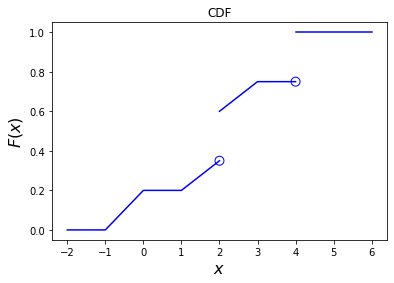

In [161]:
line1 = np.rec.array([(-2, 0), (-1, 0), (0, .2), (1, .2), (2, .35)])
line2 = np.rec.array([(2, .6), (3, .75), (4, 0.75)])
line3 = np.rec.array([(4, 1.), (6, 1.)])

plt.plot(line1.f0, line1.f1, 'b');
plt.scatter(2, .35, s=80, facecolors='none', edgecolors='b');
plt.plot(line2.f0, line2.f1, 'b');
plt.scatter(4, .75, s=80, facecolors='none', edgecolors='b');
plt.plot(line3.f0, line3.f1, 'b');

plt.xlabel('$x$', size=16);
plt.ylabel('$F(x)$', size=16);
plt.title('CDF');

---

* **(8 pts)**. Write a Python function that returns an inverse value of CDF.

In [2]:
def dumb_cdf(x):
    if -1 <= x < 0:
        return .2*x + .2
    elif 0 <= x < 1:
        return .2
    elif 1 <= x < 2:
        return .15*x + .05
    elif 2 <= x < 3:
        return .15*x + .3
    elif 3 <= x < 4:
        return .75
    elif x >= 4:
        return 1.
    else:
        return 0.
    
dumb_cdf = np.vectorize(dumb_cdf)

In [21]:
def less_dumb_cdf(x):
    out = np.zeros_like(x) 
    cond = np.logical_and(x>=-1, x<0)
    out[cond] = .2*x[cond] + .2
    cond = np.logical_and(x>=0, x<1)
    out[cond] = .2
    cond = np.logical_and(x>=1, x<2)
    out[cond] = .15*x[cond] + .05
    cond = np.logical_and(x>=2, x<3)
    out[cond] = .15*x[cond] + .3
    cond = np.logical_and(x>=3, x<4)
    out[cond] = .75
    cond = x>=4
    out[cond] = 1.
    
    return out

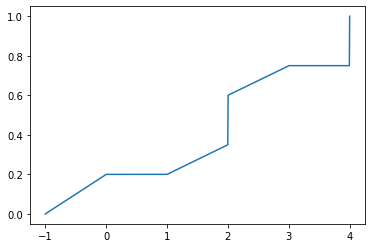

In [19]:
x = np.linspace(-1, 4, 1000)
plt.plot(x, dumb_cdf(x));

In [29]:
x = np.linspace(-1, 4, int(1e4))
t1 = %timeit -o dumb_cdf(x);
t2 = %timeit -o less_dumb_cdf(x);
t1.average / t2.average

4.38 ms ± 244 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
138 µs ± 5.15 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


31.84444614945916

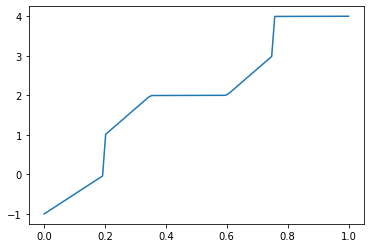

In [20]:
icdf = inverse_pwCDF(dumb_cdf, 1000, (-1, 4), CDF=True)
x = np.linspace(0, 1, 100)
plt.plot(x, icdf(x));

---

* **(10 pts)**. Write python function to generate samples of $\xi$ using *inverse sampling method*.

In [30]:
def gen_xi(n_samples, m=1000):
    icdf = inverse_pwCDF(less_dumb_cdf, m, (-1, 4), CDF=True)
    z = np.random.uniform(size=n_samples)
    return icdf(z)

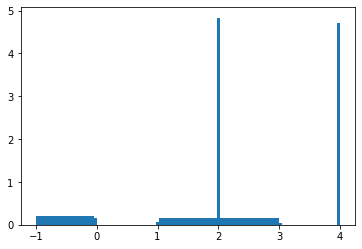

In [34]:
y = gen_xi(int(1e6))
plt.hist(y, bins='auto', density=True);

**As one can see, we've got the pdf of the target distribution**

## Problem 3 (18 pts)

We can use the results of Problem 1 to check the distribution of the samples. Namely, if the set $\{x_1,\,x_2,\,\ldots,\,x_n\}$ is sampled from a general population with CDF $F(x)$, then $F(x_1),\,F(x_2),\,\ldots,\,F(x_n)$ are sampled uniformly and we can check this using empirical histogram.
Consider the example with normal distribution $\mathcal N(1, 3)$

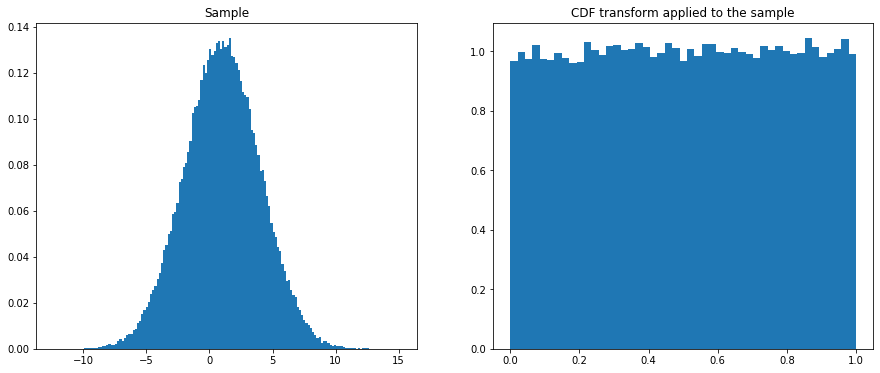

In [2]:
n = int(1e5)
samples = stats.norm.rvs(loc=1, scale=3, size=n)
samples_inv = stats.norm.cdf(samples, loc=1, scale=3)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.hist(samples    , bins='auto', density=True);
ax1.set_title('Sample')
ax2.hist(samples_inv, bins='auto', density=True);
ax2.set_title('CDF transform applied to the sample');

Now, consider a set of i.i.d. random variables $\{\xi_i\}$, and a random variable $\eta$ which is equal to an average over $M$ variables $\{\xi_i\}$
$$
\eta = \frac1M\sum_{i=1}^M\xi_i.
$$
According to [Central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem),
the random variable $\eta$ converges in distribution to a normal (recall the conditions of the corresponding statement). 

Make a sample of the variable $\eta$ of a size $10^4$–$10^6$ for  different values of $M$, and show that the distribution of $\eta$ is close to a normal with use of the method described above, for the following random variables $\{\xi_i\}$

**Don't see the value to build hists for different M, except the last point**  
**For the second distribution, one can change M manually if needed (it computes in seconds)**  
*(For the first one, it takes to much time to change anything)*

---
* **(6 pts)**. Bernoulli distribution $\mathbb P(\xi=0)=\frac13$, $\mathbb P(\xi=1)=\frac23$.

CPU times: user 3min 37s, sys: 321 ms, total: 3min 37s
Wall time: 3min 37s


Text(0.5, 1.0, 'CDF transform applied to the sample')

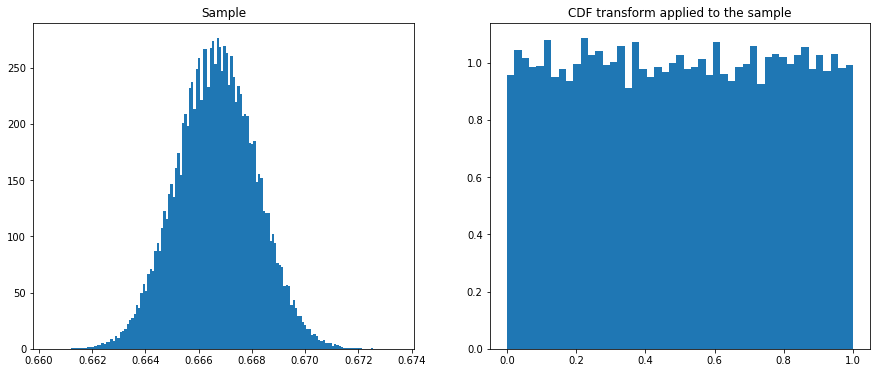

In [9]:
%%time
p = 2/3
M = 100000

n_samples = int(1e5)
samples = np.zeros(n_samples)
# to escape problems with memory (when M ~ 10^5) and make \xi_i less correlated
# I use for-loop and generate sequences with different random state
for i in range(M):
    samples += stats.bernoulli.rvs(p, size=n_samples, random_state=i)
samples /= M

f_samples = stats.norm.cdf(samples, loc=p, scale=(p*(1-p)/M)**.5)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.hist(samples, bins='auto', density=True);
ax1.set_title('Sample')
ax2.hist(f_samples, bins='auto', density=True);
ax2.set_title('CDF transform applied to the sample');

---

* **(6 pts)**. Distribution with CDF $F(x)=\frac12\bigl(1+\text{Erf}(\ln(x))\bigr)$ for $x>0$ and  $F(x)=0$ otherwise, where $\text{Erf}(x):=\frac2{\sqrt\pi}\int_0^x\exp(-\tau^2)\,d\tau$ is the [Error function](https://en.wikipedia.org/wiki/Error_function).

---

In [10]:
class CustomDistribution1(stats.rv_continuous):
    def _cdf(self, x):
        return np.where(x>0, .5*(1+erf(np.log(np.abs(x)))), 0.)

F = CustomDistribution1()
# This is a very slow way of solving this task (for M=50 it takes ~10-13 min)

# M = 50
# n_samples = int(1e4)
# samples = np.zeros(n_samples)
# for i in range(M):
#     samples += F.rvs(size=n_samples, random_state=i)
# samples /= M

# f_samples = stats.norm.cdf(samples, loc=np.e**.25, scale=((np.e-np.e**.5)/M)**.5)

$$
    p(x) = F'(x) = \frac{1}{x\sqrt{\pi}}\exp(-\ln^2 x), \quad x \gt 0\\
$$
Let $X \sim p$
$$
    \mathbb{E}_p[X] = \int_0^{\infty}\frac{x}{x\sqrt{\pi}}\exp(-\ln^2 x)dx = [y = \ln x] = \frac{1}{\sqrt{\pi}}\int_{-\infty}^{+\infty}e^{y}e^{-y^2}dy = \frac{e^{1/4}}{\sqrt{\pi}}\int_{-\infty}^{+\infty}e^{-(y-1/2)^2}dy = e^{1/4} \frac{\sqrt{\pi}}{\sqrt{\pi}} = e^{1/4}
$$

$$
    \mathrm{Var}_p[X] = \frac{1}{\sqrt{\pi}}\int_0^{\infty}\!x\exp(-\ln^2 x)dx \;\,-\,  e^{1/2}
$$

After substitution, consider just the integral
$$
    \int_{-\infty}^{+\infty}e^{2y}e^{-y^2}dy = e\int_{-\infty}^{+\infty}e^{-(y-1)^2}dy = e\sqrt{\pi}
$$

Thus,
$$
    \mathrm{Var}_p[X] = e - e^{1/2}
$$

CPU times: user 9.04 s, sys: 0 ns, total: 9.04 s
Wall time: 9.05 s


Text(0.5, 1.0, 'CDF transform applied to the sample')

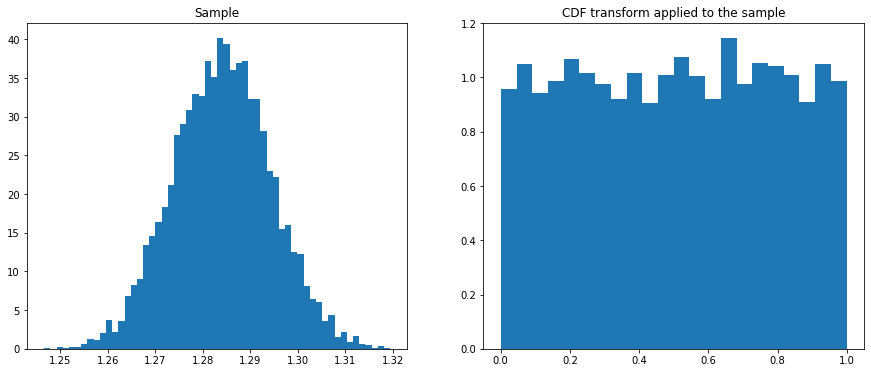

In [13]:
%%time
def custom_cdf(x):
    eps = 1e-12
    out = np.zeros_like(x)
    out[x>eps] = .5*(1+erf(np.log(x[x>eps])))
    return out

M = int(1e5) 
n_samples = int(1e4)
samples = np.zeros(n_samples)
for i in range(M):
    z = np.random.uniform(size=n_samples)
    ICDF = inverse_pwCDF(custom_cdf, 1000, (0, 40), CDF=True)
    samples += ICDF(z)
samples /= M
    

f_samples = stats.norm.cdf(samples, loc=np.e**.25, scale=((np.e-np.e**.5)/M)**.5)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.hist(samples, bins='auto', density=True);
ax1.set_title('Sample')
ax2.hist(f_samples, bins='auto', density=True);
ax2.set_title('CDF transform applied to the sample');

---

* **(6 pts)**. Distribution with CDF $F(x)=1-\frac1{x^2}$ for $x>1$ and $F(x)=0$ otherwise.

---

According to generalized CLT, mean of samples generated from Pareto distribution with $\alpha = 2$ should converge to gaussian distribution despite the infinite variance of the random variable

In [11]:
class CustomDistribution2(stats.rv_continuous):
    def _cdf(self, x):
        return np.where(x>1, 1 - 1./x**2, 0.)

F = CustomDistribution2()
# This is a very slow way of solving this task (for M=50 it takes ~10-13 min)

# M = 50
# n_samples = int(1e4)
# samples = np.zeros(n_samples)
# for i in range(M):
#     samples += F.rvs(size=n_samples, random_state=i)
# samples /= M

# f_samples = stats.norm.cdf(samples, loc=2, scale=samples.std())

$$
    p(x) = F'(x) = \frac{2}{x^3}, \quad x \gt 1\\
    \mathbb{E}_p[X] = \int_1^\infty \frac{2}{x^2}dx = -\frac{2}{x}\;\bigg\rvert_1^\infty = 2\\
    \mathrm{Var}_p[X] = \int_1^{\infty} \frac{2}{x}dx - 4 = \infty
$$


CPU times: user 57.2 s, sys: 43.5 ms, total: 57.2 s
Wall time: 57.2 s


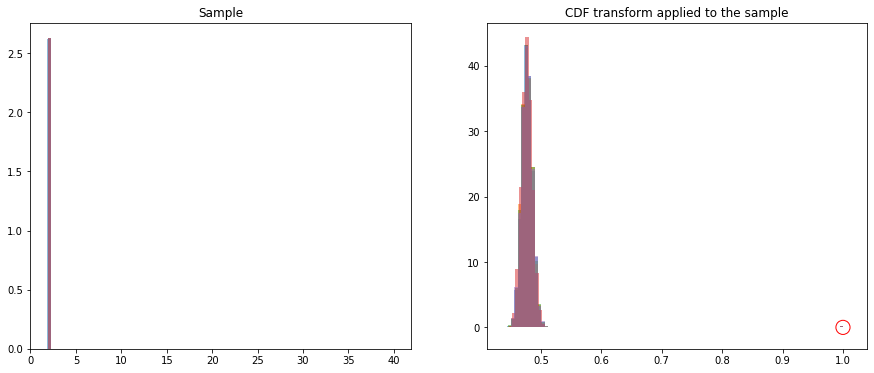

In [44]:
%%time
def custom_cdf(x):
    eps = 1e-12
    out = np.zeros_like(x)
    out[x>1+eps] = 1 - 1./x[x>1+eps]**2
    return out

M = int(1e4)
n_samples = int(1e4)
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
for m in map(int, [50, 100, 1e3, 1e4, 1e5]):
    samples = np.zeros(n_samples)
    for i in range(M):
        z = np.random.uniform(size=n_samples)
        ICDF = inverse_pwCDF(custom_cdf, 1000, (1, 40), CDF=True)
        samples += ICDF(z)
    samples /= M

    f_samples = stats.norm.cdf(samples, loc=2, scale=samples.std())

    ax1.hist(samples, bins=100, density=True, alpha=.5);
    ax1.set_title('Sample');
    ax2.hist(f_samples, bins=100, density=True, alpha=.5);
    ax2.set_title('CDF transform applied to the sample');
ax2.scatter(1, 0, s=200, facecolors='none', edgecolors='r')

**Whatever the interval [$(1, 40)$ or $(1, 100)$] you take, it will be always a small bump in the bottom-right (red circle) or somewhere else due to infinite variance**

## Problem 4 (25 pts)

This problem is a part of *density estimation* problem.
We have a sample with unknown distribution and want to sample more.

There are several ways to solve this problem.
One of the way to sample is to approximate probability distribution by the histogram of the given sample with a fixed number of bins $n$.

The samples for this task are in the file ```hw_01.data.npz```

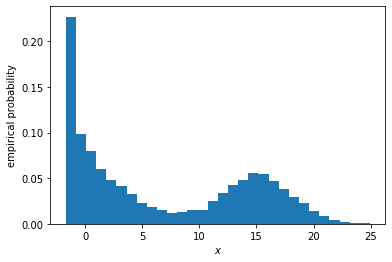

In [51]:
samples = np.load('hw_01.data.npz')['samples']
plt.hist(samples, bins=30, density=True);
plt.xlabel('$x$');
plt.ylabel('empirical probability');

In [98]:
m = 200
n = 10000
interval = samples.min(), samples.max()
z = np.sort(np.random.uniform(0, 1, n))

* **(10 pts)**. So, the first task is to write a Python function that sample random variable with the piecewise constant probability density function shown on the plot.
Check the result by building empirical histogram for the sample for a different number of bins $n$.

*Hint: use the Python code from the Lecture 2*

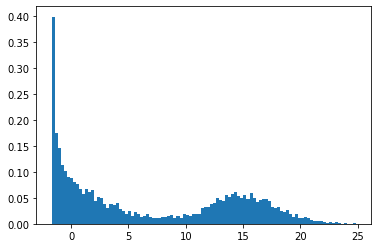

In [101]:
cdf = pwCDF(samples, m, interval, samples=True)
icdf = inverse_pwCDF(cdf, m, interval, CDF=True)
y = icdf(z)
plt.hist(y, bins=100, density=True);

The second way of solving the density estimation problem is to use [empirical distribution function](https://en.wikipedia.org/wiki/Empirical_distribution_function) $\hat{F}$. This function is defined as
$$
\hat F(x):=\frac{\#\{x_i\colon x_i\leq x\}}N,
$$
where $\{x_i\}_1^N$ are the sample set, $N$ is the total number of the elements in it.

* **(10 pts)**. Write a python function to sample a random variable which has the CDF $\hat F$ build on the sample from the file ```hw_01.data.npz```. Check the result by building empirical histogram.

In [107]:
def pw_cdf(samples):
    sorted_samples = np.sort(samples)
    N = len(sorted_samples)
    def pdf(x):
        return np.searchsorted(sorted_samples, x) / N
    return cdf

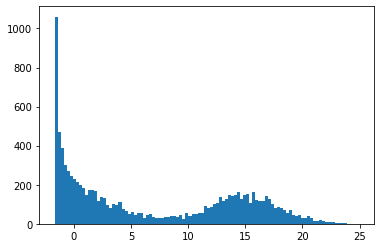

In [108]:
cdf = pw_cdf(samples)
icdf = inverse_pwCDF(cdf, m, interval, CDF=True)
plt.hist(icdf(z), bins=100);

---

* **(5 pts)**. Explain the difference between these two ways of density estimation.<br> 
**NB:** (solution to this subproblem is counted only if two previous subproblems are done).

Not quite got it.
But I'd try to say that in my implementation of the first point the cdf, that is built by the pdf, is piecewise linear.  
In the second point, the cdf, built directly from the sample, is piecewise constant. In the sense of convergence to the target distribution they should also behave differently